In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

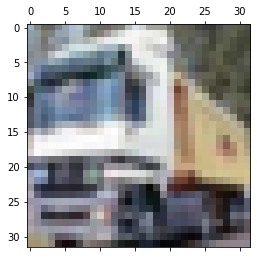

In [ ]:
plt.matshow(X_train[1])

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
classes = {'airplane','automobiles','birds','cat','deer','dog','frog','horse','ship','truck'}

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes(y[index]))

TypeError: ignored

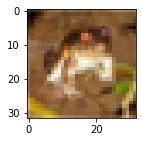

In [ ]:
plot_sample(X_train,y_train,0)

In [ ]:
X_train = X_train/255
X_test = X_test/255


In [ ]:
ann = models.Sequential([
                          layers.Flatten(input_shape=(32,32,3)),
                          layers.Dense(3000,activation = 'relu'),
                          layers.Dense(1000,activation = 'relu'),
                          layers.Dense(10,activation = 'sigmoid')
                          ])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.8097 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.6252 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5408 - accuracy: 0.4589
Epoch 4/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4830 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.4335 - accuracy: 0.4982


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
predictions = ann.predict(X_test)

In [ ]:
print(classification_report())

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4566 - accuracy: 0.4773
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.1212 - accuracy: 0.6068
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9844 - accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8999 - accuracy: 0.6866
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8391 - accuracy: 0.7084
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7831 - accuracy: 0.7270
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7369 - accuracy: 0.7436
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6943 - accuracy: 0.7568
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6566 - accuracy: 0.7689
Epoch 10/10
1563/1563 [==============================] - 62s 39m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9055 - accuracy: 0.7027


[0.9054871201515198, 0.7027000188827515]